<a href="https://colab.research.google.com/github/Chrys97/Hamoye/blob/master/Stage_B_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

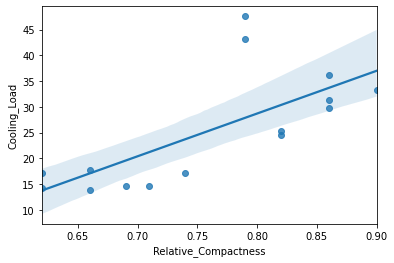

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/ENB2012_data.xlsx')
column_names = {'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 
                'Y2': 'Cooling_Load'}

df = df.rename(columns = column_names)
simple_linear_reg_df = df[['Relative_Compactness',
                           'Cooling_Load']].sample(n = 15, random_state = 2)
sns.regplot(x = 'Relative_Compactness', y = 'Cooling_Load',
            data = simple_linear_reg_df)

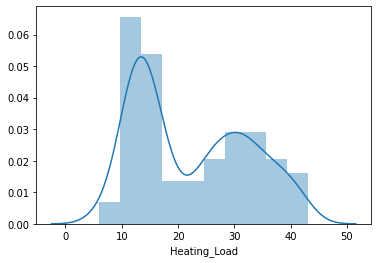

In [7]:
sns.distplot(df['Heating_Load'])

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = normalized_df.drop(columns = ['Heating_Load', 'Cooling_Load'])
heating_target = normalized_df['Heating_Load']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, 
                                                    heating_target, 
                                                    test_size = 0.3, 
                                                    random_state = 1)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
predicted_values = linear_model.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicted_values)
round(mse, 3)

0.008

In [11]:
rmse = np.sqrt(mse)
round(rmse, 3)

0.089

In [12]:
ssr = np.sum(np.square(y_test - predicted_values))
round(ssr, 3)

1.823

In [13]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

In [28]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### comparing the effects of regularization


In [34]:
linear_model_weights = get_weights_df(linear_model, x_train,'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

In [38]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on ='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on = 'Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000
